## Лабораторная работа №3
# "Методы поиска подстроки в строке"
## Выполнила студентка группы БСТ1901 Леонова Полина
### Ход работы
Выполнить задание 1 и задание 2
#### Задние №1
Реализовать методы поиска подстроки в строке. Добавить возможность
ввода строки и подстроки с клавиатуры. Предусмотреть возможность
существования пробела. Реализовать возможность выбора опции
чувствительности или нечувствительности к регистру. Оценить время работы
каждого алгоритма поиска и сравнить его со временем работы стандартной
функции поиска, используемой в выбранном языке программирования.
##### Алгоритмы:
1.Кнута-Морриса-Пратта
2.Упрощенный Бойера-Мура

#### Алгоритм Кнута-Морриса-Пратта
Данный алгоритм появился где-то в 70-е годы прошлого столетия, основан на префиксной фунции.
Данный алгоритм имеет ограничения: лучше использовать на алфавитах с малым количеством символов, тк будет более эффективен.
У этого алгоритма есть проблемка, он бзвозвратный, те все время идем вперед, а назад вернуться не можем.

In [11]:
def prefix(s):
    v = [0]*len(s)
    for i in range(1,len(s)):
        k = v[i-1]
        while k > 0 and s[k] != s[i]:
            k = v[k-1]
        if s[k] == s[i]:
            k = k + 1
        v[i] = k
    return v

def kmp(s, t):
    index = -1
    f = prefix(s)
    k = 0
    for i in range(len(t)):
        while k > 0 and s[k] != t[i]:
            k = f[k-1]
        if s[k] == t[i]:
            k = k + 1
        if k == len(s):
            index = i - len(s) + 1
            break
    return index

#### Упрощенный алгоритм Бойера-Мура
Основан где-то в 75 году прошлого века, заключается в том, что можно смотреть с конца.
Мощный алгоритм, но тоже есть ограничения, если алфавит очень маленький, то лучше не использовать

In [12]:
def bmPredCompil(x):
    d = {}
    lenX = len(x)
    for i in range(len(x)):
        # сколько символов с правого края до этой буквы
        d[ord(x[i])] = lenX - i
    return d

def boyerMurSearch(x, s):
    d = bmPredCompil(x)
    # k - проход по s
    # j - проход по x
    # i - место начала прохода по s
    lenX = i = j = k = len(x)
    while j > 0 and i<=len(s):
     # совпали, двигаемся дальше (от конца к началу)
        if s[k-1] == x[j-1]:
            k -= 1
            j -= 1
        # иначе, продвигаемся по строке на d и начинаем с правого конца подстроки снова
        else:
            i += d[ord(s[i])]
            j = lenX
            k = i
    if j <= 0:# нашли
        return k
    return None # не нашли

def search(s, t, alg=kmp, ignore_case=False, ignore_space=False):
    if ignore_case:
        s = s.lower()
        t = t.lower()
        
    if ignore_space:
        s = s.replace(' ', '')
        t = t.replace(' ', '')
        
    return alg(s, t)

In [13]:
import time
import string

alg = {
    'Кнута-Морриса-Пратта': kmp,
    'Бойера-Мура': boyerMurSearch,
      }

for key, a in alg.items():
    time_start = time.perf_counter()
    search('acD', 'aaaacd', alg=a, ignore_case=True, ignore_space=True)
    print(f'{key} - {time.perf_counter() - time_start}')
    
time_start = time.perf_counter()
'aaaacd'.find('acD')
print(f'Встроенная сортировка - {time.perf_counter() - time_start}')


Кнута-Морриса-Пратта - 3.710000009959913e-05
Бойера-Мура - 2.9600000289065065e-05
Встроенная сортировка - 0.0010956999999507389


#### Задание №2 "Пятнашки"
Игра в 15, пятнашки, такен — популярная головоломка, придуманная в 1878 году Ноем Чепмэном. Она представляет собой набор одинаковых квадратных костяшек с нанесёнными числами, заключённых в квадратную коробку. Длина стороны коробки в четыре раза больше длины стороны костяшек для набора из 15 элементов, соответственно в коробке остаётся незаполненным одно квадратное поле. Цель игры — перемещая костяшки по коробке, добиться упорядочивания их по номерам, желательно сделав как можно меньше перемещений.
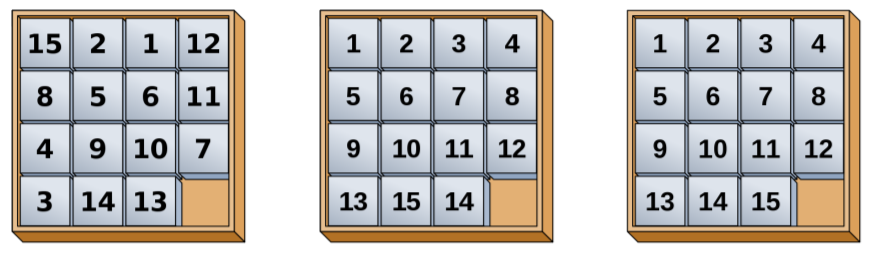
На рисунках выше изображены различные позиции элементов в задаче:
1. Левый рисунок — одна из возможных начальных позиций элементов.
2. Средний рисунок — одна из «нерешаемых» позиций.
3. Правый рисунок — позиция, где все элементы расставлены в правильном порядке.
Задача: написать программу, определяющую, является ли данное
расположение «решаемым», то есть можно ли из него за конечное число
шагов перейти к правильному. Если это возможно, то необходимо найти хотя
бы одно решение - последовательность движений, после которой числа будут
расположены в правильном порядке.
Входные данные: массив чисел, представляющий собой расстановку в
порядке «слева направо, сверху вниз». Число 0 обозначает пустое поле.
Например, массив [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0] представляет
собой «решенную» позицию элементов.
Выходные данные: если решения нет, то функция должна вернуть
пустой массив []. Если решение есть, то необходимо представить решение —
для каждого шага записывается номер передвигаемого на данном шаге
элемента.
Например, для начального расположения элементов [1, 2, 3, 4, 5, 6, 7, 8,
13, 9, 11, 12, 10, 14, 15, 0] одним из возможных решений будет [15, 14, 10, 13,
9, 10, 14, 15] (последовательность шагов здесь: двигаем 15, двигаем 14,
двигаем 10, …, двигаем 15).

In [14]:
from queue import PriorityQueue

N = 4

def moves(position):
    blank = position.index(0)
    i, j = divmod(blank, N)
    offsets = []
    if i > 0: offsets.append(-N)     # вниз
    if i < N - 1: offsets.append(N)  # вверх
    if j > 0: offsets.append(-1)     # вправо
    if j < N - 1: offsets.append(1)  # влево
    for offset in offsets:
        swap = blank + offset
        yield tuple(position[swap] if x==blank else position[blank] if x==swap else position[x] for x in range(N*N))


def parity(permutation):
    seen, cycles = set(), 0
    for i in permutation:
        if i not in seen:
            cycles += 1
            while i not in seen:
                seen.add(i)
                i = permutation[i]
    return (cycles + len(permutation)) % 2


class Position:
    def __init__(self, position, start_distance):
        self.position = position
        self.start_distance = start_distance

    def __lt__(self, other):
        return self.start_distance < other.start_distance

    def __str__(self):
        return '\n'.join((N*'{:3}').format(*[i%(N*N) for i in self.position[i:]]) for i in range(0, N*N, N))

SOLVED = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0)

start = [1, 2, 3, 4, 5, 6, 7, 8, 13, 9, 11, 12, 10, 14, 15, 0]

if parity(start) == 0:
    # https://en.wikipedia.org/wiki/15_puzzle#Solvability
    print('Нерешаемо')
else:
    start = tuple(start)

    p = Position(start, 0)

    print(p)
    print()

    candidates = PriorityQueue()
    candidates.put(p)

    visited = set([p])

    came_from = {p.position: None}
    
    while p.position != SOLVED:
        p = candidates.get()
        for k in moves(p.position):
            if k not in visited:
                candidates.put(Position(k, p.start_distance + 1))
                came_from[k] = p
                visited.add(k)

    path = []
    prev = p
    while p.position != start:
        p = came_from[p.position]
        number = p.position[prev.position.index(0)]
        path.append(number)
        prev = p
    path.reverse()

    print(path)

  1  2  3  4
  5  6  7  8
 13  9 11 12
 10 14 15  0

[15, 14, 10, 13, 9, 10, 14, 15]
